In [1]:
%autosave 0

Autosave disabled


# Conclusion

In [2]:
import pandas as pd
import numpy as np
import xgboost
from pandas import read_csv
import pandas
import numpy as np
import matplotlib.pyplot as plt
import csv
from alys import save as SV
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [3]:
isSave = False

In [4]:
df_new = read_csv("Base_Files/gmctv3.csv", index_col =0)
x_test = read_csv("Base_Files/gmctv2_test.csv", index_col =0)
df_full_test = read_csv("Base_Files/gmctv2_test.csv")

In [5]:
Y_full = df_new['target']
X_full = df_new.drop(['target'], axis=1)

In [6]:
# Xtrain_for_kaggle = df_new

# x_train, y_train = train_test_split(X_full, test_size=0.2, random_state=42)

In [7]:
X_full.shape, Y_full.shape

((150000, 18), (150000,))

In [8]:

##model xgb
xgb_model_kaggle = xgboost.XGBClassifier(n_estimators=550, max_depth=5, learning_rate=0.01,  subsample=0.5, colsample_bytree=0.5)
xgb_model_kaggle.fit(X_full,Y_full) 
#prediction
y_test_proba = xgb_model_kaggle.predict_proba(x_test)
y_test_scores = y_test_proba[:,1]


In [9]:
if isSave :
    dump(xgb_model_kaggle, 'xgb_model_ia.joblib')

In [10]:
xId = pd.DataFrame(y_test_scores)
xId['Id'] = df_full_test['id']
xId = xId[['Id',0]]
xId.columns = ['Id','Probability']
xId.head(5)

,Id,Probability
0,1,0.059040
1,2,0.045454
2,3,0.021017
3,4,0.075936
4,5,0.076447


In [11]:
xId.to_csv('forkagg.csv', index=False)

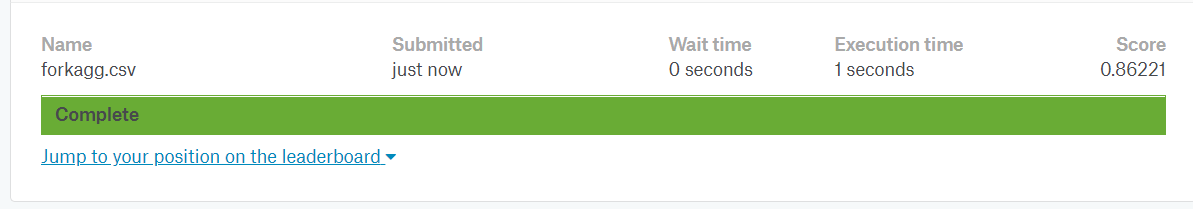

In [12]:
from IPython.display import Image
Image("png/1.png")